In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns


#initialising label encoder for word labels in dataset
label_encoder=preprocessing.LabelEncoder()

#loading data
data=pd.read_csv('dataset - netflix1.csv')

In [2]:
#showing first 10 values
data.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [3]:
#checking null values present or not
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [4]:
#finding dtype of every column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
#changing date_added column dtype to datetime
data['date_added']=pd.to_datetime(data['date_added'])


In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

In [7]:
#in the data machines cannot understand text data and
#every data in data set is not useful in our analysis
#so we should convert useful data into numeric form
#removing unuseful columns
data.drop(columns=['show_id','title','listed_in','duration'])

,type,director,country,date_added,release_year,rating
0,Movie,Kirsten Johnson,United States,2021-09-25,2020,PG-13
1,TV Show,Julien Leclercq,France,2021-09-24,2021,TV-MA
2,TV Show,Mike Flanagan,United States,2021-09-24,2021,TV-MA
3,Movie,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG
4,Movie,Haile Gerima,United States,2021-09-24,1993,TV-MA
...,...,...,...,...,...,...
8785,TV Show,Not Given,Turkey,2017-01-17,2016,TV-PG
8786,TV Show,Not Given,United States,2018-09-13,2016,TV-Y7
8787,TV Show,Not Given,Pakistan,2016-12-15,2012,TV-PG
8788,TV Show,Not Given,Pakistan,2018-06-23,2016,TV-Y


In [8]:
data['type']=label_encoder.fit_transform(data['type'])
data['director']=label_encoder.fit_transform(data['director'])

data['country']=label_encoder.fit_transform(data['country'])
data['rating']=label_encoder.fit_transform(data['rating'])


<Axes: >

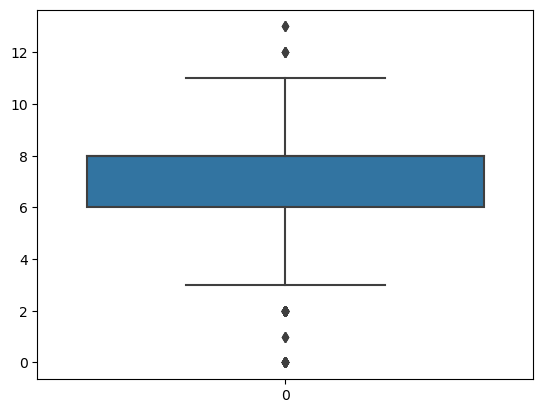

In [9]:
#z-score method
#boxplotting rating column 
sns.boxplot(data['rating'])



In [10]:
#finding outliers for rating column
upper_limit_rating=data['rating'].mean()+3*data['rating'].std()
lower_limit_rating=data['rating'].mean()-3*data['rating'].std()
print(upper_limit_rating,lower_limit_rating)
outliers=data.loc[(data['rating']>upper_limit_rating) | (data['rating']<lower_limit_rating)]

print(len(outliers))
#deleting outliers for rating
new_data=data.loc[~((data['rating']>upper_limit_rating) | (data['rating']<lower_limit_rating))]

len(new_data)

12.868447471536571 1.1661372838672968
47


8743

<Axes: >

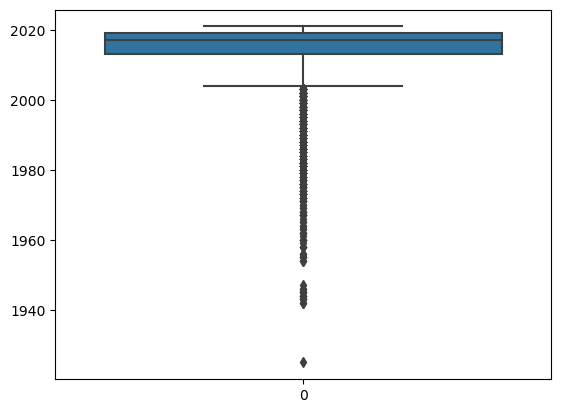

In [11]:
#boxplotting for release_year column
sns.boxplot(data['release_year'])


In [12]:
#finding outliers for release_year
upper_limit_release_year=data['release_year'].mean()+3*data['release_year'].std()
lower_limit_release_year=data['release_year'].mean()-3*data['release_year'].std()
print(upper_limit_rating,lower_limit_rating)

outliers=new_data.loc[(data['release_year']>upper_limit_release_year) | (data['release_year']<lower_limit_release_year)]

print(len(outliers))
#deleting outliers for release_year
new_data=new_data.loc[~((data['release_year']>upper_limit_release_year) | (data['release_year']<lower_limit_release_year))]



12.868447471536571 1.1661372838672968
206


In [13]:
new_data.to_csv('cleaned_data.csv',index=False)